In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

***PARTE 1: OBJETIVO***
***

El objetivo de este proyecto es intentar responder a la siguiente pregunta: ¿Cuál sería el lugar ideal para vivir? No es una pregunta sencilla de responder a priori pero quizá, como hipótesis, se podría decir que el lugar ideal para vivir sería un pais desarrollado con datos positivos en sus variables que lo avalen.

**PARTE 2: LIMPIEZA DE DATOS**
***

In [29]:
df_mundo = pd.read_csv('./data/world-data-2023.csv')


In [30]:
df_mundo.info() #el dataset esta muy completo, tiene muy pocos nulos, se pueden usar todas las variables si es preciso
#las columnas calling code, capital/major city, Largest city, Official language y abbreviation no me interesan para mi estudio, tengo que eliminarlas
#eliminare los valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [31]:
df_mundo.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [32]:
#elimino las columnas que no necesito
df_mundo.drop(['Abbreviation', 'Calling Code', 'Capital/Major City','Largest city', 'Official language'], axis=1, inplace=True)
df_mundo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Currency-Code                              180 non-null    object 
 10  Fertility Rate            

In [33]:
#elimino los valores nulos
df_mundo.dropna(inplace=True)

In [34]:
#eliminamos los duplicados
df_mundo.drop_duplicates(inplace=True)
df_mundo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 193
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    112 non-null    object 
 1   Density
(P/Km2)                            112 non-null    object 
 2   Agricultural Land( %)                      112 non-null    object 
 3   Land Area(Km2)                             112 non-null    object 
 4   Armed Forces size                          112 non-null    object 
 5   Birth Rate                                 112 non-null    float64
 6   Co2-Emissions                              112 non-null    object 
 7   CPI                                        112 non-null    object 
 8   CPI Change (%)                             112 non-null    object 
 9   Currency-Code                              112 non-null    object 
 10  Fertility Rate                 

In [8]:
df_mundo.describe()

,Birth Rate,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,20.240804,2.679643,20.260714,72.683036,138.196429,1.915536,20.473923,22.197749
std,10.047046,1.309903,18.420848,7.042329,201.046265,1.598291,24.491259,60.746451
min,6.400000,0.980000,1.700000,54.300000,2.000000,0.010000,-40.900557,-106.346771
25%,11.225000,1.687500,6.100000,67.525000,14.500000,0.417500,7.497422,-3.810957
50%,17.830000,2.200000,13.600000,74.400000,41.000000,1.640000,21.033608,21.791488
75%,28.375000,3.522500,32.025000,77.450000,179.000000,3.025000,40.223245,49.104707
max,46.080000,6.910000,78.500000,83.300000,1120.000000,7.120000,61.524010,178.065032


In [9]:
df_mundo.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,AFN,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,ALL,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,DZD,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,AOA,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
6,Argentina,17,54.30%,"2,780,400","105,000",17.02,"201,348",232.75,53.50%,ARS,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672


In [35]:
#cambio las comas por puntos, elimino los %, excepeto de la columna country 

df_mundo.iloc[:, 1:] = df_mundo.iloc[:, 1:].replace({'%': '', ',': '.'}, regex=True)
df_mundo

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,58.10,652.230,323.000,32.49,8.672,149.9,2.30,AFN,...,78.40,0.28,38.041.754,48.90,9.30,71.40,11.12,9.797.273,33.939110,67.709953
1,Albania,105,43.10,28.748,9.000,11.78,4.536,119.05,1.40,ALL,...,56.90,1.20,2.854.191,55.70,18.60,36.60,12.33,1.747.593,41.153332,20.168331
2,Algeria,18,17.40,2.381.741,317.000,24.28,150.006,151.36,2.00,DZD,...,28.10,1.72,43.053.054,41.20,37.20,66.10,11.70,31.510.100,28.033886,1.659626
4,Angola,26,47.50,1.246.700,117.000,40.73,34.693,261.73,17.10,AOA,...,33.40,0.21,31.825.295,77.50,9.20,49.10,6.89,21.061.025,-11.202692,17.873887
6,Argentina,17,54.30,2.780.400,105.000,17.02,201.348,232.75,53.50,ARS,...,17.60,3.96,44.938.712,61.30,10.10,106.30,9.79,41.339.571,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,United Kingdom,281,71.70,243.610,148.000,11.00,379.025,119.62,1.70,GBP,...,14.80,2.81,66.834.405,62.80,25.50,30.60,3.85,55.908.316,55.378051,-3.435973
186,United States,36,44.40,9.833.517,1.359.000,11.60,5.006.302,117.24,7.50,USD,...,11.10,2.61,328.239.523,62.00,9.60,36.60,14.70,270.663.028,37.090240,-95.712891
187,Uruguay,20,82.60,176.215,22.000,13.86,6.766,202.92,7.90,UYU,...,16.20,5.05,3.461.734,64.00,20.10,41.80,8.73,3.303.394,-32.522779,-55.765835
191,Vietnam,314,39.30,331.210,522.000,16.75,192.668,163.52,2.80,VND,...,43.50,0.82,96.462.106,77.40,19.10,37.60,2.01,35.332.140,14.058324,108.277199


In [48]:
#paso las variables a tipo float
#uso error=coerce para que los datos que no puedan psarse a float sean nan
df_mundo['Agricultural Land( %)'] = pd.to_numeric(df_mundo['Agricultural Land( %)'], errors='coerce')
df_mundo['Land Area(Km2)'] = pd.to_numeric(df_mundo['Land Area(Km2)'], errors='coerce')
df_mundo['Armed Forces size'] = pd.to_numeric(df_mundo['Armed Forces size'], errors='coerce')
df_mundo['Co2-Emissions'] = pd.to_numeric(df_mundo['Co2-Emissions'], errors='coerce')
df_mundo['CPI'] = pd.to_numeric(df_mundo['CPI'], errors='coerce')
df_mundo['Forested Area (%)'] = pd.to_numeric(df_mundo['Forested Area (%)'], errors='coerce')
df_mundo['Gasoline Price'] = pd.to_numeric(df_mundo['Gasoline Price'], errors='coerce')
df_mundo['GDP'] = pd.to_numeric(df_mundo['GDP'], errors='coerce')
df_mundo['Gross primary education enrollment (%)'] = pd.to_numeric(df_mundo['Gross primary education enrollment (%)'], errors='coerce')
df_mundo['Gross tertiary education enrollment (%)'] = pd.to_numeric(df_mundo['Gross tertiary education enrollment (%)'], errors='coerce')
df_mundo['Minimum wage'] = pd.to_numeric(df_mundo['Minimum wage'], errors='coerce')
df_mundo['Out of pocket health expenditure'] = pd.to_numeric(df_mundo['Out of pocket health expenditure'], errors='coerce')
df_mundo['Population'] = pd.to_numeric(df_mundo['Population'], errors='coerce')
df_mundo['Population: Labor force participation (%)'] = pd.to_numeric(df_mundo['Population: Labor force participation (%)'], errors='coerce')
df_mundo['Tax revenue (%)'] = pd.to_numeric(df_mundo['Tax revenue (%)'], errors='coerce')
df_mundo['Total tax rate'] = pd.to_numeric(df_mundo['Total tax rate'], errors='coerce')
df_mundo['Unemployment rate'] = pd.to_numeric(df_mundo['Unemployment rate'], errors='coerce')
df_mundo['Urban_population'] = pd.to_numeric(df_mundo['Urban_population'], errors='coerce')


df_mundo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 193
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    112 non-null    string 
 1   Density
(P/Km2)                            112 non-null    string 
 2   Agricultural Land( %)                      112 non-null    Float64
 3   Land Area(Km2)                             90 non-null     Float64
 4   Armed Forces size                          108 non-null    Float64
 5   Birth Rate                                 112 non-null    Float64
 6   Co2-Emissions                              108 non-null    Float64
 7   CPI                                        111 non-null    Float64
 8   CPI Change (%)                             112 non-null    string 
 9   Currency-Code                              112 non-null    string 
 10  Fertility Rate                 

In [49]:
float_columns = df_mundo.select_dtypes(include=['float'])
float_columns

,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,Fertility Rate,Forested Area (%),Gasoline Price,GDP,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,58.1,652.23,323.0,32.49,8.672,149.9,4.47,2.1,<NA>,<NA>,...,78.4,0.28,<NA>,48.9,9.3,71.4,11.12,<NA>,33.93911,67.709953
1,43.1,28.748,9.0,11.78,4.536,119.05,1.62,28.1,<NA>,<NA>,...,56.9,1.2,<NA>,55.7,18.6,36.6,12.33,<NA>,41.153332,20.168331
2,17.4,<NA>,317.0,24.28,150.006,151.36,3.02,0.8,<NA>,<NA>,...,28.1,1.72,<NA>,41.2,37.2,66.1,11.7,<NA>,28.033886,1.659626
4,47.5,<NA>,117.0,40.73,34.693,261.73,5.52,46.3,<NA>,<NA>,...,33.4,0.21,<NA>,77.5,9.2,49.1,6.89,<NA>,-11.202692,17.873887
6,54.3,<NA>,105.0,17.02,201.348,232.75,2.26,9.8,<NA>,<NA>,...,17.6,3.96,<NA>,61.3,10.1,106.3,9.79,<NA>,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,71.7,243.61,148.0,11.0,379.025,119.62,1.68,13.1,<NA>,<NA>,...,14.8,2.81,<NA>,62.8,25.5,30.6,3.85,<NA>,55.378051,-3.435973
186,44.4,<NA>,<NA>,11.6,<NA>,117.24,1.73,33.9,<NA>,<NA>,...,11.1,2.61,<NA>,62.0,9.6,36.6,14.7,<NA>,37.09024,-95.712891
187,82.6,176.215,22.0,13.86,6.766,202.92,1.97,10.7,<NA>,<NA>,...,16.2,5.05,<NA>,64.0,20.1,41.8,8.73,<NA>,-32.522779,-55.765835
191,39.3,331.21,522.0,16.75,192.668,163.52,2.05,48.1,<NA>,<NA>,...,43.5,0.82,<NA>,77.4,19.1,37.6,2.01,<NA>,14.058324,108.277199


**PARTE 3: TABLA DE VARIABLES**
***

In [50]:
#Averiguamos la cardinalidad de las variables. Si cardinalidad < 10 serán categóricas, si no, serán numéricas
cardinalidad = df_mundo.nunique()
cardinalidad

Country                                      112
Density\n(P/Km2)                              86
Agricultural Land( %)                        104
Land Area(Km2)                                90
Armed Forces size                             78
Birth Rate                                   103
Co2-Emissions                                108
CPI                                          110
CPI Change (%)                                65
Currency-Code                                 90
Fertility Rate                                97
Forested Area (%)                            103
Gasoline Price                                 0
GDP                                            0
Gross primary education enrollment (%)        90
Gross tertiary education enrollment (%)      108
Infant mortality                              91
Life expectancy                               87
Maternal mortality ratio                      78
Minimum wage                                   0
Out of pocket health

In [51]:
#Todas las variables son numéricas ya que la cardinalidad > 10 en todas 
#Averiguamos el porcentaje de cardinalidad. Si % cardinalidad > 30% serán numéricas continuas, si no, serán discretas
porcentaje_cardinalidad = (cardinalidad / len(df_mundo)) * 100
porcentaje_cardinalidad 

Country                                      100.000000
Density\n(P/Km2)                              76.785714
Agricultural Land( %)                         92.857143
Land Area(Km2)                                80.357143
Armed Forces size                             69.642857
Birth Rate                                    91.964286
Co2-Emissions                                 96.428571
CPI                                           98.214286
CPI Change (%)                                58.035714
Currency-Code                                 80.357143
Fertility Rate                                86.607143
Forested Area (%)                             91.964286
Gasoline Price                                 0.000000
GDP                                            0.000000
Gross primary education enrollment (%)        80.357143
Gross tertiary education enrollment (%)       96.428571
Infant mortality                              81.250000
Life expectancy                               77

Todas las variables son numéricas continuas ya que la cardinalidad es mayor de 10 y el porcentaje de cardinalidad es mayor del 30%. Además, se observa que hay varias variables target/directoras, ya que su cardinalidad es del 100%. Estas variables son: country, land area (km2), co2-emissions, GDP, population, urban_population, latitude y longitude.

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Country|País|Numérica continua/índice/directora/target|0||
|Density|Densidad (p/km2)|Numérica continua|1|||
|Agricultural Land( %)|% tierras agrícolas|Numérica continua|2|||
|Land Area(Km2) |Superficie terrestre (km2)|Numérica continua/índice/directora/target|0|||
|Armed Forces size|Tamaño fuerzas armadas|Numérica continua|3|||
|Birth Rate|Tasa de natalidad|Numérica continua|2|||
|Co2-Emissions |Emisiones CO2 (toneladas)|Numérica continua/índice/directora/target|0|||
|CPI|IPC|Numérica continua|2||
|CPI Change (%) |Variación % IPC (respecto al año interior) |Numérica continua|2|||
|Currency-Code |Moneda|Numérica continua|3|||
|Fertility Rate|Tasa de fertilidad|Numérica continua|2|||
|Forested Area (%)  |Superficie forestal|Numérica continua|1|||
|GDP |PIB|Numérica continua/índice/directora/target|2|||
|Gross primary education enrollment (%)  |Matrícula Educación Primaria %|Numérica continua|1|||
|Gross tertiary education enrollment (%)|Matrícula Educación Terciaria %|Numérica continua|1|||
|Infant mortality  |Mortalidad infantil|Numérica continua|2|||
|Life expectancy  |Esperanza de vida|Numérica continua|1|||
|Maternal mortality ratio   |Tasa de mortalidad infantil|Numérica continua|2|||
|Minimum wage  |Salario mínimo|Numérica continua|1|||
|Maternal mortality ratio   |Tasa de mortalidad materna|Numérica continua|2|||
|Out of pocket health expenditure  |Gasto por persona en salud|Numérica continua|1|||
|Physicians per thousand  |Nº médicos por cada mil habitantes|Numérica continua|1|||
|Population |Población|Numérica continua/índice/directora/target|0|||
|Population: Labor force participation (%)   |Población participante fuerza laboral|Numérica continua|2|||
|Tax revenue (%)  |% beneficios comerciales|Numérica continua|3|||
|Unemployment rate  |Tasa de desempleo|Numérica continua|1|||
|Total tax rate  |Carga fiscal global|Numérica continua|3|||
|Urban_population  |Población urbana|Numérica continua/índice/directora/target|0|||
|Latitude  |Latitud|Numérica continua/índice/directora/target|0|||
|Longitude  |Longitud|Numérica continua/índice/directora/target|0|||
|Gasoline price  |Precio gasolina/litro|Numérica continua|2|||

**PARTE 4: ANÁLISIS**
***

Debido a que el objetivo de mi estudio es averiguar el mejor país para vivir, voy a usar como variable directora principal country y voy a hacer varios tipos de análisis. Primero, un análisis univariante de algunas variables porque quiero averiguar si hay muchos valores dispersos, para comprobar la diferencia entre países. Para ello, usaré la desviación típica. Después, haré un análisis bivariante para averiguar la correlación entre algunas variables, de forma general en el mundo y usaré la correlación de Pearson. Por último, basándome en la media de cada variable, haré un ranking de países de mayor a menor calidad para vivir. Para ello, crearé una nueva columna en el dataframe, la cual llamaré "cantidad de 1". Si una variable positiva, en un país, es mayor de la media se sumará un 1 y si es una variable negativa, y el valor está por debajo de la media, se sumará un 1. El ranking se ordenará en función de la cantidad de 1 que tengan los países. A continuación, haré una clasificación en función de los países que sean aptos o no aptos para vivir (según su cantidad de 1) y, a su vez cuál sería el mejor y el peor país para vivir.

In [52]:
df_mundo.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate',
       'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

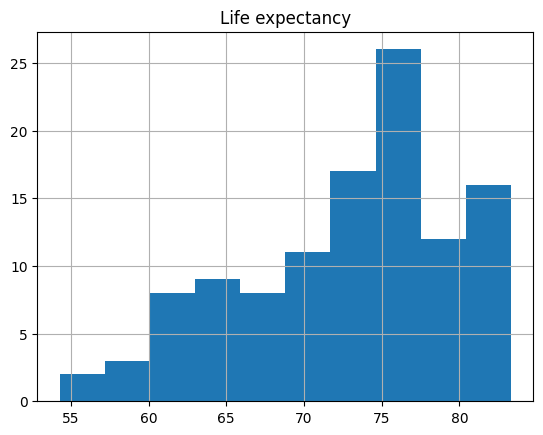

In [53]:
#esperanza de vida en el mundo
df_mundo.hist(column='Life expectancy')
plt.show()

In [54]:
#calculo la desviacion tipica de diferentes variables para averiguar si hay muchos valores dispersos o no
#esto me permitirá saber si hay mucha o poca variación en el mundo
std_dev_f = df_mundo['Fertility Rate'].std()
std_dev_f

1.3099026362080948

In [55]:
std_dev_b = df_mundo['Birth Rate'].std()
std_dev_b

10.047046281773328

In [56]:
std_dev_i = df_mundo['Infant mortality'].std()
std_dev_i


18.420847752414435

In [57]:
std_dev_p = df_mundo['Physicians per thousand'].std()
std_dev_p

1.598290663101691

In [58]:
std_dev_ar = df_mundo['Armed Forces size'].std()
std_dev_ar

181.3989815730766

In [59]:
std_dev_cpi = df_mundo['CPI'].std()
std_dev_cpi

60.293279363971536

In [60]:
std_dev_ed = df_mundo['Gross primary education enrollment (%)'].std()
std_dev_ed

11.62074654752225

In [61]:
std_dev_edd = df_mundo['Gross tertiary education enrollment (%)'].std()
std_dev_edd

28.961974901353244

In [62]:
std_dev_h = df_mundo['Out of pocket health expenditure'].std()
std_dev_h

18.587441270195665

In [63]:
std_dev_un = df_mundo['Unemployment rate'].std()
std_dev_un

4.313364702632396

In [64]:
std_dev_ur = df_mundo['Urban_population'].std()
std_dev_ur

242.8305592982939

In [65]:
std_dev_m = df_mundo['Maternal mortality ratio'].std()
std_dev_m

201.04626509301463

In [66]:
std_dev_t = df_mundo['Tax revenue (%)'].std()
std_dev_t

6.468243817977418

In [67]:
std_dev_ag = df_mundo['Agricultural Land( %)'].std()
std_dev_ag

19.41948279272486

In [68]:
std_dev_CO = df_mundo['Co2-Emissions'].std()
std_dev_CO

182.71162499181446

Como conclusión, destacaría que la fertilidad, la natalidad, la cantidad de médicos por cada mil habitantes, la esperanza de vida, el porcentaje de beneficios comerciales, la tasa de desempleo, el porcentaje de tierras agrícolas y la educación primaria son parecidas en todo el mundo ya que la desviación típica es menor del 15%. Sin embargo, diría que la mortalidad infantil, el gasto en salud por persona y la educación terciaria es más diferente en el mundo ya que su desviación típica es mayor del 15%, incluso la educación terciaria diría que hay bastante diferencia ya que está rozando la desviación típica el 30%. En cuanto al IPC se diría que la diferencia es bastante alta ya que nos encontramos con una desviacion del 60%. Y, por último, las diferencias enormes que se pueden observar son las emisiones de CO2, el tamaño de las fuerzas armadas, la población urbana y la tasa de mortalidad materna.

In [69]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_mundo['Birth Rate'], df_mundo['Life expectancy'])
correlation
#Existe una alta correlación negativa entre la esperanza de vida y la tasa de natalidad, lo que significa que las dos variables están asociadas en sentido inverso
#Significa que cuando la esperanza de vida sea alta, la tasa de natalidad será baja y viceversa

-0.8775537653541257

***Primera conclusión:*** la tasa de natalidad influye de forma negativa en la esperanza de vida. A mayor cantidad de niños nacidos, la esperanza de vida será menor para la población. ¿A qué puede ser debido? ¿Menos oportunidades por niño, menos dinero por niño, más sobrepoblación para la cantidad de médicos, más posibilidades de mortalidad infantil?

In [70]:
correlation, p_value = pearsonr(df_mundo['Life expectancy'], df_mundo['Infant mortality'])
correlation
#Existe una alta correlación negativa entre la esperanza de vida y la tasa de natalidad, lo que significa que las dos variables están asociadas en sentido inverso
#Significa que cuando la esperanza de vida sea alta, la tasa de mortalidad infantil será baja y viceversa

-0.9307655905715554

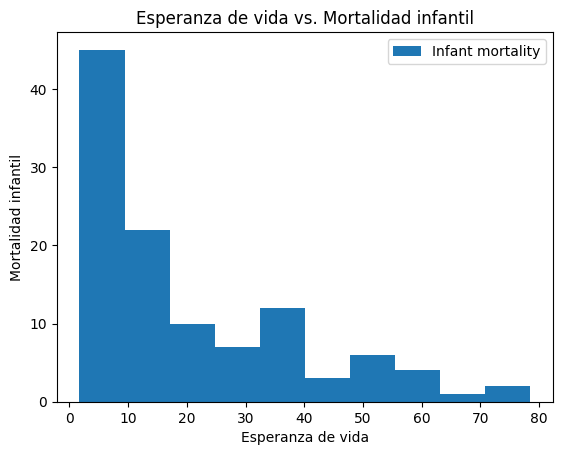

In [71]:
df_mundo.plot(x='Life expectancy', y='Infant mortality', kind='hist')
plt.xlabel('Esperanza de vida')
plt.ylabel('Mortalidad infantil')
plt.title('Esperanza de vida vs. Mortalidad infantil')
plt.show()

***Segunda conclusión:*** la tasa de mortalidad influye de forma negativa en la esperanza de vida. A mayor cantidad de niños muertos, la esperanza de vida será menor para la población. ¿A qué puede ser debido? ¿Relación entre mortalidad infantil y tasa de natalidad?

In [72]:
correlation, p_value = pearsonr(df_mundo['Birth Rate'], df_mundo['Infant mortality'])
correlation
#Existe una alta correlación positiva entre la tasa de natalidad ymortalidad infantil, lo que significa que las dos variables están asociadas de forma directa
#Significa que cuando la tasa de natalidad sea alta, la mortalidad infantil será alta y viceversa

0.8849320029132772

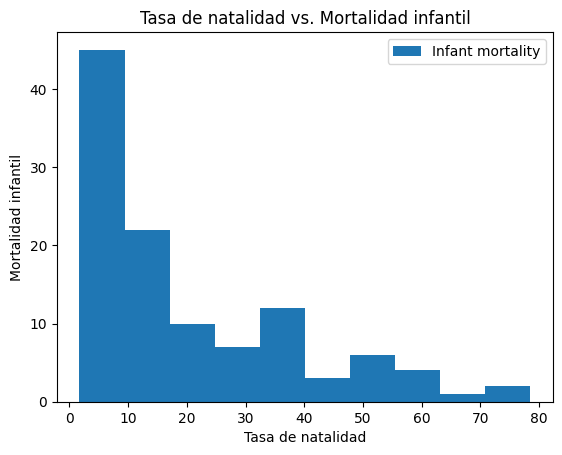

In [73]:
df_mundo.plot(x='Birth Rate', y='Infant mortality', kind='hist')
plt.xlabel('Tasa de natalidad')
plt.ylabel('Mortalidad infantil')
plt.title('Tasa de natalidad vs. Mortalidad infantil')
plt.show()

***Tercera conclusión:*** la tasa de natalidad influye de forma positiva en la mortalidad infantil. A mayor cantidad de niños nacidos, implicará una mayor mortalidad. 

In [74]:
correlation, p_value = pearsonr(df_mundo['Life expectancy'], df_mundo['Physicians per thousand'])
correlation
#Existe una alta correlación positiva entre la esperanza de vida y la tasa de natalidad, lo que significa que las dos variables están asociadas de forma directa
#Significa que cuando la esperanza de vida sea alta, la cantidad de médicos/1000 habitantes será alta y viceversa

0.6902091844781157

***Cuarta conclusión:*** la cantidad de médicos influye de forma positiva en la esperanza de vida. A mayor cantidad de médicos, la esperanza de vida será mayor para la población. 

In [75]:
correlation, p_value = pearsonr(df_mundo['Birth Rate'], df_mundo['Fertility Rate'])
correlation
#Existe una alta correlación positiva entre la tasa de fertilidad y la tasa de natalidad, lo que significa que las dos variables están asociadas de forma directa
#Significa que cuando la tasa de fertilidad sea alta, la tasa de natalidad será alta y viceversa

0.9822209685921491

***Quinta conclusión:*** la tasa de fertilidad influye de forma positiva en la tasa de natalidad. Si la población es más fértil, la tasa de natalidad será mayor para la población.

In [76]:
correlation, p_value = pearsonr(df_mundo['Infant mortality'], df_mundo['Maternal mortality ratio'])
correlation
#Existe una alta correlación positiva entre la tasa de mortalidad infantil y la tasa de mortalidad materna, lo que significa que las dos variables están asociadas de forma directa
#Significa que cuando la tasa de mortalidad materna sea alta, la tasa de mortalidad infantil será alta y viceversa

0.8833214461410345

***Sexta conclusión:*** la tasa de mortalidad materna influye de forma positiva en la tasa de mortalidad infantil. Es más probable que si muere uno de los dos durante el parto, también muera el otro.

In [77]:
correlation, p_value = pearsonr(df_mundo['Gross primary education enrollment (%)'], df_mundo['Gross tertiary education enrollment (%)'])
correlation
#Existe una alta correlación negativa entre la educación primaria y la educación terciaria, lo que significa que las dos variables están asociadas de forma inversa
#Significa que cuando la tasa de eduación primaria sube, la tasa de educación terciaria baja y viceversa
#Pero es una correlación débil

-0.15482024996739532

***Séptima conclusión:*** basándome en la desviación y en la correlación, se podría decir que hay menos diferencia en el mundo sobre la cantidad de personas que acceden a la educación primaria, pero sí se nota diferencia con la educación terciaria. Existe una correlación negativa entre ambas variables pero es débil lo que significa que hay otros factores en juego.

In [78]:
correlation, p_value = pearsonr(df_mundo['Life expectancy'], df_mundo['Gross tertiary education enrollment (%)'])
correlation
#Existe una alta correlación positiva entre la esperanza de vida y la educación terciaria, lo que significa que las dos variables están asociadas de forma directa
#Significa que cuando la tasa de educación terciaria es alta, la esperanza de vida sube significativamente y viceversa

0.7666160730570042

***Octava conclusión:*** existe una alta correlación positiva entre la esperanza de vida y la tasa de educación terciaria. Esto significa que en los países con mayor acceso a una educación superior, la esperanza de vida aumenta.

In [79]:
correlation, p_value = pearsonr(df_mundo['Unemployment rate'], df_mundo['Gross tertiary education enrollment (%)'])
correlation
#Existe una correlación positiva entre la tasa de desmepleo y la educación terciaria, lo que significa que las dos variables están asociadas de forma directa
  

0.17647336836740304

In [80]:
correlation, p_value = pearsonr(df_mundo['Unemployment rate'], df_mundo['Gross primary education enrollment (%)'])
correlation
#Existe una correlación negativa entre la tasa de desmepleo y la educación terciaria, lo que significa que las dos variables están asociadas de forma inversa
  

-0.05781185780500679

***Novena conclusión:*** existe una correlación positiva entre el acceso a la educación terciaria y la tasa de desempleo, pero es mínima. Y lo mismo ocurre con el acceso a la educación primaria pero al contrario. Esto puede significar que es mínimamente más sencillo encontrar trabajo solo con la eduación primaria y que el acceder a una educación superior no garantiza mayores oportunidades de empleo, de hecho podríamos decir que, aunque de forma mínima, no es una ventaja. ¿Podríamos decir que quizá la población podría estar sobrecualificada para la oferta de trabajo existente?

In [81]:
correlation, p_value = pearsonr(df_mundo['Unemployment rate'], df_mundo['Birth Rate'])
correlation
#Existe una correlación negativa entre la tasa de desempleo y la tasa de natalidad, lo que significa que las dos variables están asociadas de forma inversa

-0.0649566008065778

***Décima conclusión:*** podríamos decir que no existe prácticamente ninguna correlación entre la tasa de natalidad y el desempleo, lo que podría significar que estar trabajando no es un factor determinante para tener hijos. 

In [82]:
correlation, p_value = pearsonr(df_mundo['Unemployment rate'], df_mundo['Life expectancy'])
correlation
#Existe una correlación positiva entre la tasa de desempleo y la esperanza de vida, lo que significa que las dos variables están asociadas de forma directa

0.12142409810224769

***Undécima conclusión:*** podríamos decir que no existe prácticamente ninguna correlación entre la esperanza de vida y el desempleo, lo que podría significar que estar trabajando no es un factor determinante para tener más años de vida. 

Ahora averiguaré las medias de cada variable.

In [83]:
df_mundo.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate',
       'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [85]:
mean2 = df_mundo['Land Area(Km2)'].mean()
mean2

249.9467666666667

In [86]:
mean3 = df_mundo['Armed Forces size'].mean()
mean3

124.12962962962963

In [87]:
mean4 = df_mundo['Birth Rate'].mean()
mean4

20.240803571428575

In [88]:
mean5 = df_mundo['Co2-Emissions'].mean()
mean5

118.90950925925927

In [89]:
mean6 = df_mundo['CPI'].mean()
mean6

150.4862162162162

In [90]:
mean7 = df_mundo['Fertility Rate'].mean()
mean7

2.679642857142857

In [91]:
mean8 = df_mundo['Forested Area (%)'].mean()
mean8

29.766964285714284

In [92]:
mean9 = df_mundo['Gross primary education enrollment (%)'].mean()
mean9

103.55714285714285

In [93]:
mean10 = df_mundo['Gross tertiary education enrollment (%)'].mean()
mean10

41.22589285714285

In [94]:
mean11 = df_mundo['Infant mortality'].mean()
mean11

20.260714285714283

In [95]:
mean12 = df_mundo['Life expectancy'].mean()
mean12

72.68303571428571

In [96]:
mean13 = df_mundo['Maternal mortality ratio'].mean()
mean13

138.19642857142858

In [97]:
mean14 = df_mundo['Out of pocket health expenditure'].mean()
mean14

35.25

In [98]:
mean15 = df_mundo['Physicians per thousand'].mean()
mean15

1.9155357142857146

In [99]:
mean16 = df_mundo['Population'].mean()
mean16

533.1681666666667

In [100]:
mean17 = df_mundo['Tax revenue (%)'].mean()
mean17

15.616964285714285

In [101]:
mean18= df_mundo['Unemployment rate'].mean()
mean18

6.653571428571429

In [102]:
mean19 = df_mundo['Urban_population'].mean()
mean19

475.3067000000001

Por último, basándome en la media de cada variable, haré un ranking de países de mayor a menor calidad para vivir. Primero, voy a dividir las variables en positivas y negativas. Después, crearé una nueva columna en el dataframe, la cual llamaré "cantidad de 1". Si una variable positiva, en un país, es mayor de la media se sumará un 1 y si es una variable negativa, y el valor está por debajo de la media, se sumará un 1. El ranking se ordenará de mayor a menor en función de la cantidad de 1 que tengan los países.

In [117]:
#asigno las variables positivas
variables_positivas = ['Agricultural Land( %)', 'Armed Forces size', 'Fertility Rate', 'Forested Area (%)', 'GDP',
                       'Gross primary education enrollment (%)','Gross primary education enrollment (%)',
                       'Life expectancy', 'Minimum wage', 'Physicians per thousand', 'Urban_population']
#asigno las variables negativas
variables_negativas = ['Density\n(P/Km2', 'Co2-Emissions', 'CPI', 'Gasoline Price', 'Infant mortality',
                       'Maternal mortality ratio', 'Out of pocket health expenditure', 'Unemployment rate' ]

#calculo las medias de todas las variables de tipo float
df_mundo.select_dtypes(include=['float']).mean()

#creo la variable 'cantidad de 1' y la inicializo en 0
df_mundo['cantidad de 1'] = 0

#creo un bucle for para poder comparar cada variable de cada pais con la media de esa variable en todo el dataframe
for col in df_mundo.select_dtypes(include=['float']).columns:
    if col != 'Country': # si es una columna que no sea country
        mean = df_mundo[col].mean() #declaramos la media
        if col in variables_positivas: #primero empezamos con las variables positivas
            df_mundo.loc[df_mundo[col] > mean, 'cantidad de 1'] += 1 #si el valor es mayor de la media, se suma un 1 al contador en la variable cantidad de 1
        elif col in variables_negativas: #después continuamos con las variables negativas
            df_mundo.loc[df_mundo[col] < mean, 'cantidad de 1'] += 1 #si el valor es menor de la media, se suma un 1 al contador en la variable cantidad de 1

#esto me sirve para que me aparezcan las 112 filas del dataframe, para ver todos los países
pd.set_option('display.max_rows', 112) 

#creamos un ranking ordenado de mayor a menor (en función del número de 1 sumados en la variable 'cantidad de 1')
df_mundo.groupby('Country')['cantidad de 1'].sum().sort_values(ascending=False)




Country
Luxembourg                          10
Lithuania                           10
Germany                             10
Romania                             10
Israel                              10
Peru                                 9
Colombia                             9
Estonia                              9
Portugal                             9
Czech Republic                       9
Poland                               9
Belgium                              9
Trinidad and Tobago                  9
Mexico                               9
Paraguay                             8
Republic of Ireland                  8
Hungary                              8
Oman                                 8
Saudi Arabia                         8
Greece                               8
New Zealand                          8
Fiji                                 8
Lebanon                              8
Slovakia                             8
France                               8
Malta            

In [124]:
#creo una escala para saber qué países se considerarían aptos para vivir (si tienen más de un 6 en la cantidad de 1)
#para ello creo una nueva variable 'apto' (si es mayor o igual que 6) o 'no apto (en el resto de casos)
df_mundo['apto'] = df_mundo['cantidad de 1'] >= 6
df_mundo['apto'] = df_mundo['apto'].replace({True: 'Apto', False: 'No apto'})

df_mundo[['Country', 'cantidad de 1', 'apto']]

,Country,cantidad de 1,apto
0,Afghanistan,6,Apto
1,Albania,6,Apto
2,Algeria,6,Apto
4,Angola,6,Apto
6,Argentina,6,Apto
7,Armenia,6,Apto
8,Australia,7,Apto
10,Azerbaijan,6,Apto
13,Bangladesh,5,No apto
14,Barbados,5,No apto


In [127]:
#agrupo los países por cantidad de 1
df_mundo.groupby(['cantidad de 1', 'Country']).size().reset_index(name='count')


,cantidad de 1,Country,count
0,2,Sudan,1
1,3,India,1
2,3,Mali,1
3,3,Nepal,1
4,3,Nigeria,1
5,3,Tajikistan,1
6,4,Indonesia,1
7,4,Iran,1
8,4,Iraq,1
9,4,Nicaragua,1


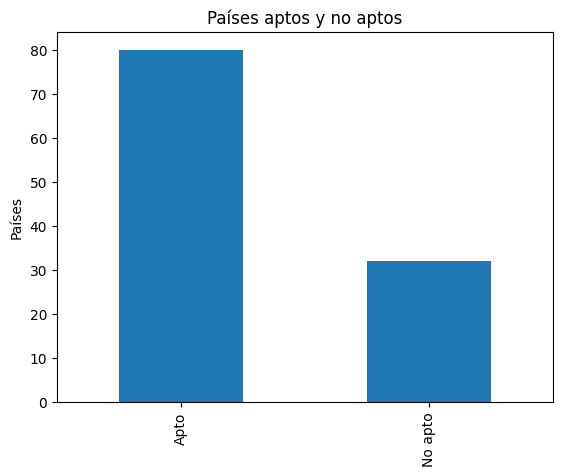

In [130]:
#creamos la gráfica de barras
ax = df_mundo['apto'].value_counts().plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Países')
ax.set_title('Países aptos y no aptos')
plt.show()


Voy a pintar las gráficas de los países aptos en función de su puntuación (de 6 a 10).

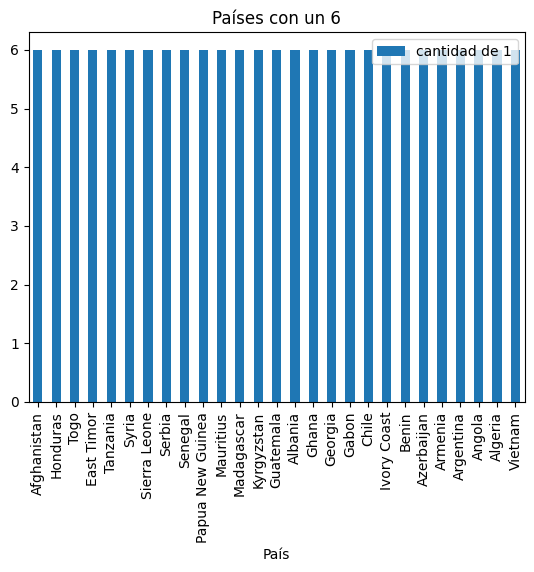

In [134]:
#seleccionamos las filas correspondientes a los países aptos con un 6 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([6]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 6')
plt.show()



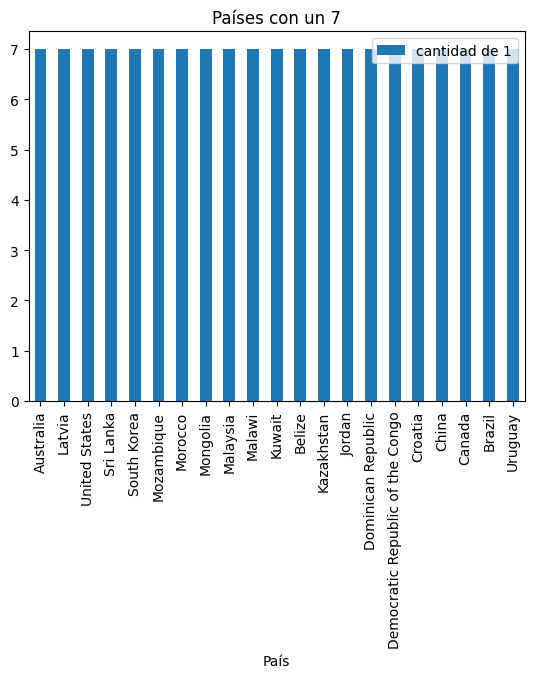

In [136]:
#seleccionamos las filas correspondientes a los países aptos con un 7 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([7]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 7')
plt.show()

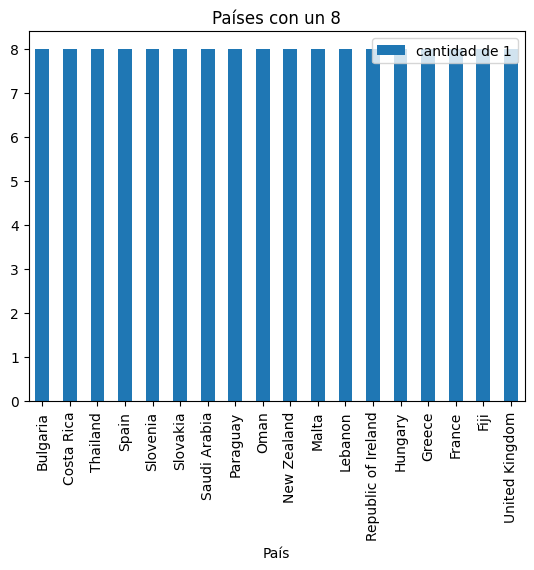

In [137]:
#seleccionamos las filas correspondientes a los países aptos con un 8 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([8]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 8')
plt.show()

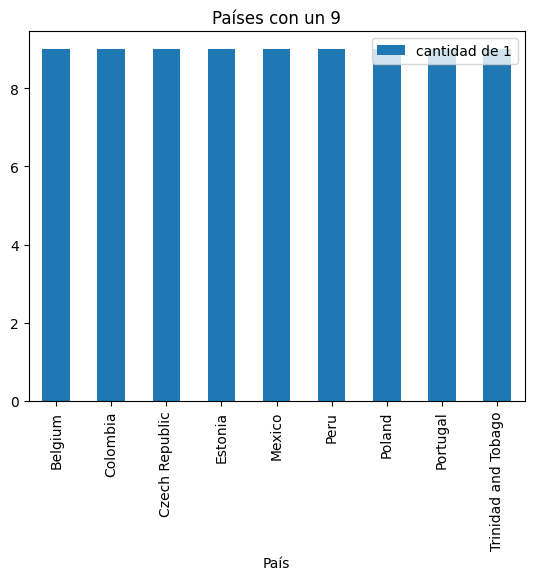

In [138]:
#seleccionamos las filas correspondientes a los países aptos con un 9 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([9]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 9')
plt.show()

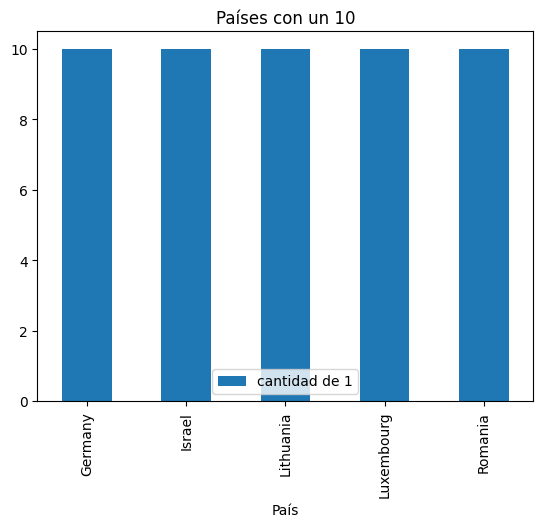

In [139]:
#seleccionamos las filas correspondientes a los países aptos con un 10 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([10]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 10')
plt.show()

Voy a pintar las gráficas de los países no aptos en función de su puntuación (menor de 6).

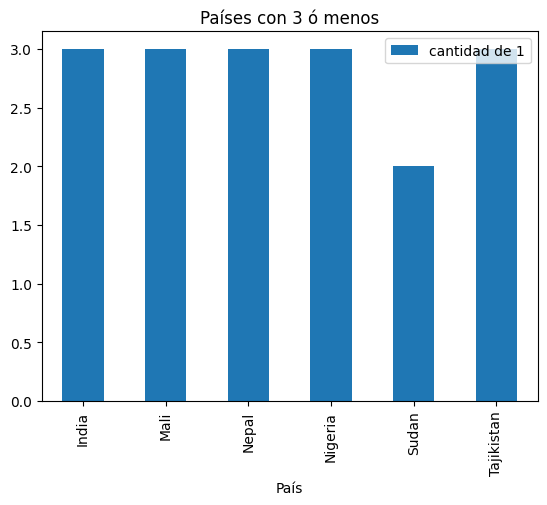

In [151]:
#filtramos los países con una cantidad de 1 igual a 3 o 2
df_filtrado = df_mundo[(df_mundo['cantidad de 1'] == 3) | (df_mundo['cantidad de 1'] == 2)]

#creamos la gráfica de barras
ax = df_filtrado.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con 3 ó menos')
plt.show()


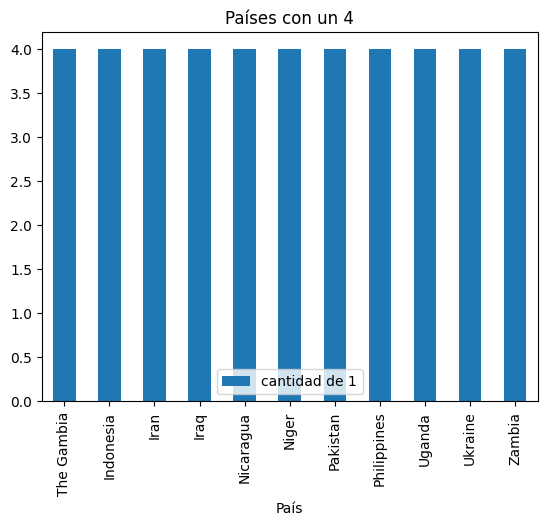

In [146]:
#seleccionamos las filas correspondientes a los países no aptos con un 4 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([4]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 4')
plt.show()

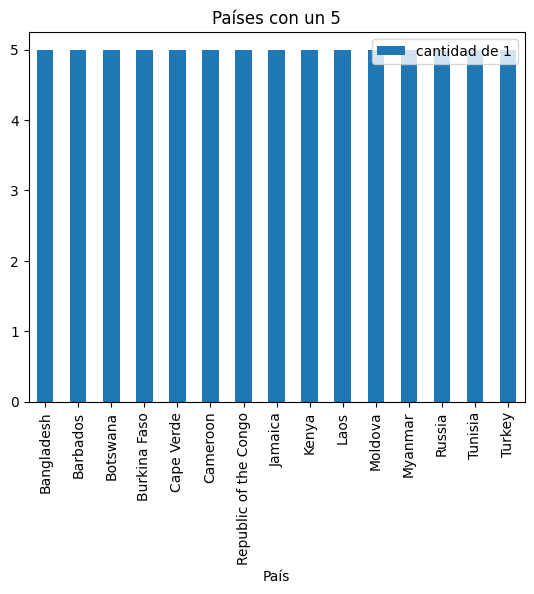

In [147]:
#seleccionamos las filas correspondientes a los países no aptos con un 5 y las columnas 'Country' y 'cantidad de 1'
df_aptos = df_mundo.loc[df_mundo['cantidad de 1'].isin([5]), ['Country', 'cantidad de 1']]

#ordenamos los países por cantidad de 1
df_aptos = df_aptos.sort_values('cantidad de 1', ascending=False)

#creamos la gráfica de barras
ax = df_aptos.plot.bar(x='Country', y='cantidad de 1', rot=90)
ax.set_xlabel('País')
ax.set_ylabel('')
ax.set_title('Países con un 5')
plt.show()

***PARTE 5: CONCLUSIONES***
***

Recuperando el objetivo inicial del proyecto que era responder a la gran pregunta: ¿cuál es el mejor lugar para vivir? nos encontramos en la tesitura de que no existe un lugar ideal para vivir.

Las características de un país dependen de multitud de factores que es imposible reflejar solo con unos datos, además de que siempre nos encontramos con la subjetividad enorme de los ojos de quien lo mire. A fin de cuentas, ¿qué es lo que buscamos para estar o ser felices? En el mundo somos tantas y tantas personas, que es muy probable que cada una midamos las variables de forma muy diferente porque al final todo depende del prisma con el que se mire.

Quizá para una persona sea muy importante que un país tenga mucha vegetación y quizá para otra persona que busque estar en una gran urbe no le da tanta importancia a un factor como las emisiones de CO2. Quizá también nos encontremos con alguien que no quiera tener hijos y por ello le de igual la natalidad de un país o incluso, si nos fijamos en la desigualdad de riqueza en el mundo, no creo que una persona millonaria se fije mucho en la tasa de desempleo de un país al que este optando para vivir.

Sin embargo, como todo en la vida, este proyecto también tiene una parte de subjetividad: la mía. Considero que lugares con una tasa de desempleo baja, con amplias zonas forestales, con baja mortalidad, con un acceso a la educación factible, con una sanidad pública y suficiente y con una gran esperanza de vida, son factores fundamentales para vivir una vida plena, saludable y feliz. En base a ello, he descubierto que países como Alemania, Luxemburgo, Lituania, Israel y Rumanía cumplirían con esas expectativas. A pesar de ello, creo que no eligiría ninguno de esos países como mi lugar ideal para vivir y si, ni yo misma he averiguado mi lugar ideal, dudo que un planeta entero se pusiera de acuerdo para lograrlo.

Al fin y al cabo, solo somos un puntito más en medio de algo muy grande y al final, el lugar ideal no existe, solo nos pasamos la vida intentando encontrarlo.

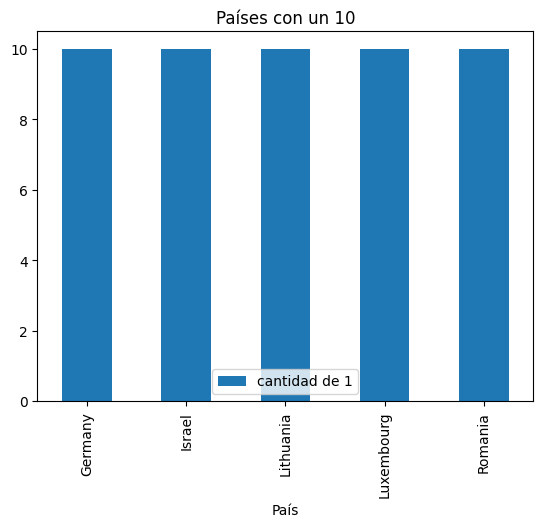